<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) | [Contents](Index.ipynb) | [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 特徵工程

不管要處理的問題所包含的資訊是什麼，取出這些資訊，然後把它們轉換成可以使用的數字，讓你可以據此建立成為特徵矩陣。

## 分類特徵

最常見的非數值資料。

In [1]:
# 房價資料:價格(price)和房間數(rooms)
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
# 可能直接會想以這樣的方式呈現，但這樣能表示的資訊就不多
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

在此例，一種被驗證過的技巧是使用*one-hot encoding*，它建立了額外的欄位，使用0或1來指示"有"或是"沒有"出現某類別。當把資料變成一個字典的串列時，Scikit-Learn的 ``DictVectorizer``就可以為你做這件事:

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

留意鄰居(neighborhood)欄被擴展成3個分別的欄位，代表3個鄰居的標籤，而每一列中的該欄位如果是1就表示他有這個鄰居。把類別特徵進行此種編碼，就可以使用一般的程序來擬合一個Scikit-Learn模型。


In [4]:
# 檢視每一個欄的意義，可以觀察此特徵的名稱
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

此種方始有一個明顯的缺點:如果分類中有許多可能的值，可能會讓資料集增加*非常多*。然而，因為編碼的資料中包含的內容大部份都是0，使用稀疏輸出(sparse output)是非常有效的解決方案:

In [5]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

許多(但還不是全部)的Scikit-Learn評估器當在擬合和評估模型時接受此種稀疏型態的輸入。``sklearn.preprocessing.OneHotEncoder``和``sklearn.feature_extraction.FeatureHasher``是Scikit-Learn中用來支援這一類型編碼的2個額外工具。

## 文字特徵

另一個在特徵工程中常用的需求是把文字轉換成可表示數值資料的集合。例如，大部分社群媒體的自動探勘技術是建立在把文字編碼成數字的某些形式上。編碼資料中最簡單的其中一個方法是*字數的計算*: 拿取任一個文字片段，計算其中每一個字出現的次數，然後把結果放入表格中。

In [6]:
# 三個片語的集合
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

要依照文字出現的次數來把這筆資料向量化，可以建立一個欄用來表示"problem"這個字，還有"evil"以及"horizon"等欄。儘管可以手動的完成這件事，但是使用Scikit-Learn的 ``CountVectorizer``可以省去許多麻煩事:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

上述的結果是一個紀錄每一個字出現次數的稀疏矩陣，如果把它轉換成一個``DataFrame`` 的型態再加上欄的名稱會更容易進行觀察:

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


然而這種方法有一些問題:原始的字數計算會導致特徵被放太多的權重在非常高頻出現的字上，如此在一些分類演算法中會比較沒那麼好。一個修正這個問題的方法是*term frequency-inverse document frequency* (*TF–IDF*)，可透過計算文字出現在文件中的頻率來加權文字出現的次數。

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## 影像特徵


## 推導的特徵(Derived Features)

從一些輸入特徵中，以數學的方式推導出來。

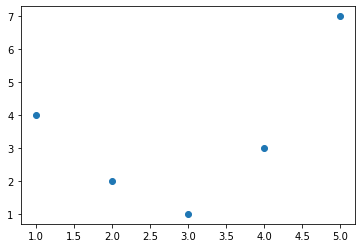

In [10]:
# 從圖中的資料可發現無法被一條直線完美描述
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

但還是可以用``LinearRegression``去擬合一條直線而且取得最佳的結果

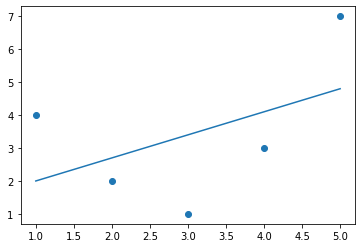

In [11]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

需要更複雜的模型來描述$x$和$y$之間的關係。藉由轉換這些資料，可以增加額外的特徵欄位，讓這個模型更有彈性來做到。

例如，可把多項式特徵加到資料中，如下所示:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False) # Generate polynomial and interaction features.
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


推導的特徵矩陣有一個欄位代表$x$，第二個欄位代表$x^2$，第三個欄位代表$x^3$。
在此一延伸的輸入中計算線性迴歸可以得到一個非常接近資料之擬合:

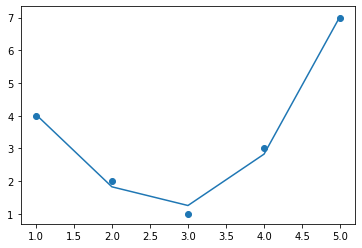

In [13]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## 缺失資料的插補

在特徵工程中另一個常見的需求是處理缺失的資料。

In [14]:
# 舉例資料集
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

當打算把資料套用到典型的機器學習模型上時，首先需要把那些缺失的資料使用一些合適的值填上，即為缺失資料的插補(Imputation)。

In [16]:
# 基本的補值方法為Imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean') # 以平均值補值
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [17]:
# 將補值後的資料用線性迴歸訓練
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## 特徵管線

使用手動執行轉換很快地變得非常繁瑣，尤其是在打算把多個步驟串接在一起的時候。
例如，進行一個如下所示的處理管線:
1. 使用平均值替補缺失的資料
2. 轉換特徵成為二階方程式
3. 擬合線性迴歸

要讓上述的處理成為並行的管線，Scikit-Learn提供了``Pipeline``物件，可以透過以下方式使用:

In [19]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

這個pipeline不僅看起來，就連其行為也很像是一個標準的Scikit-Learn物件，而且將會把所有指定的步驟套用到任一輸入的資料。

In [20]:
model.fit(X, y)  # 含有缺失資料的X，來自於之前的例子
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
